<img src="images/title.png" style="width:950px;height:450px;">

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
import matplotlib.image as mpimg
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

## Data Exploration
#### Vamos explorar um exemplo, projeto end-to-end, de precos de casas apresentado no livro do Aurelien Geron

In [52]:
# Fazendo o loading do arquivo de dados
housing = pd.read_csv("housing.csv")

The `df.head()` This function returns the first `n` rows for the object based on position.

In [53]:
# Visualizando o head dos dados, formato etc.
housing.head()   # head() = head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The `df.info()` method is useful to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values

In [54]:
# Checar as infromacoes/tipos de cada variavel/feature.
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The `df.describe()` method shows a summary of the numerical attributes. The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations falls $min+(max-min)*percentile$. 

In [55]:
# A funcao describe vai descrever estatisticamente os dados de todas as variaveis.
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The `df.hist()` method on the whole dataset, and it will plot a histogram for each numerical attribute

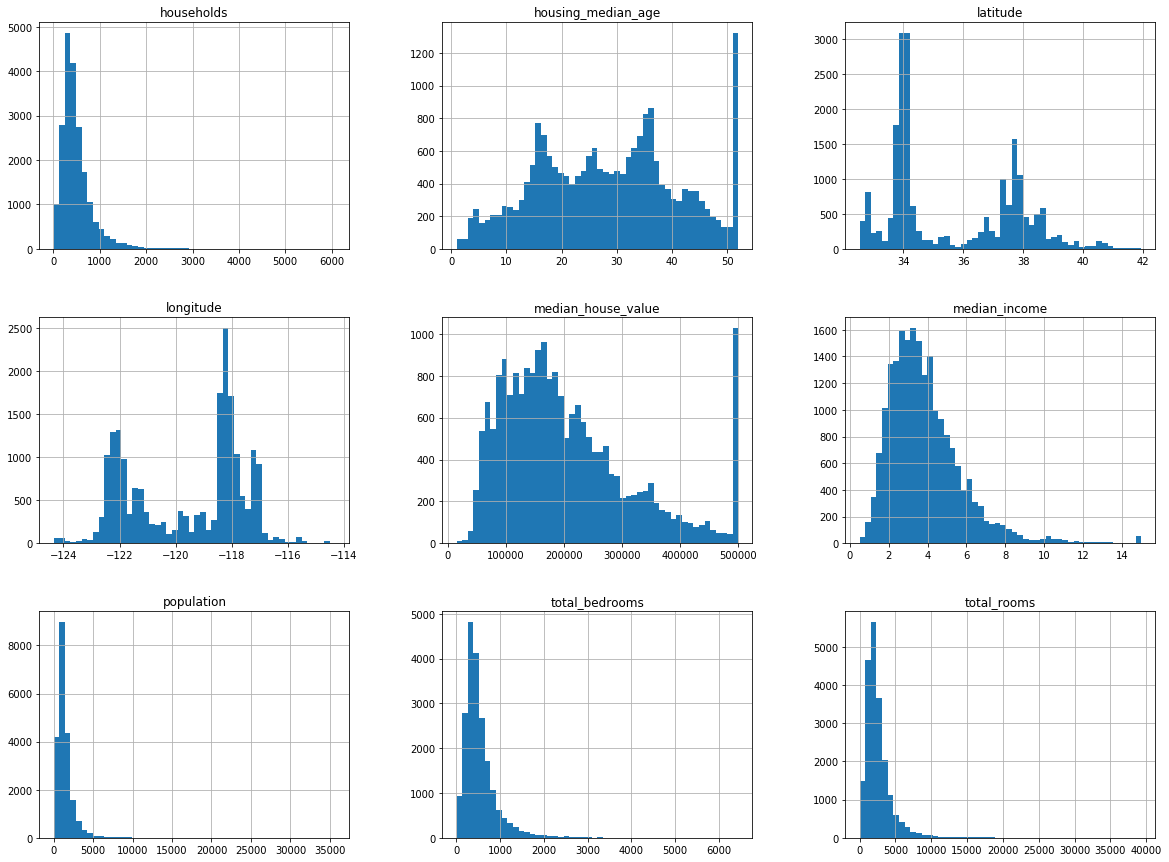

In [56]:
# Histograma de todas as features sao apresentados abaixo.
housing.hist(bins=50, figsize=(20,15))
plt.show()

* We often evaluate a property by its location. So let's investigate the price of the house by location using `box plot`.

* A `box plot` (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

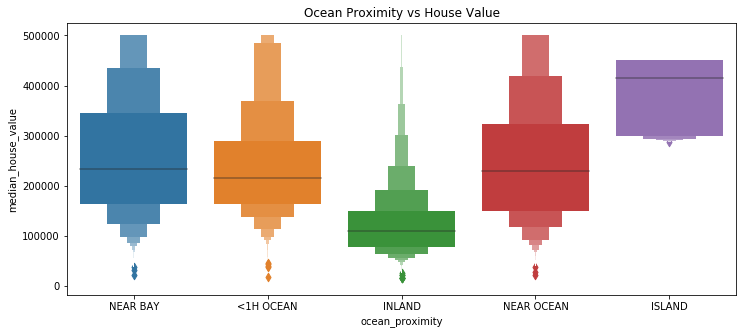

In [57]:
# O box-plot apresenta o preco medio/mediana das casas baseado na proximidade das propriedades com o oceano.
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxenplot(x ='ocean_proximity', y ='median_house_value', data=housing)
plt.title('Ocean Proximity vs House Value')
plt.show()

### What conclusions can we get from the box plot above?
### Algumas perguntas referentes a essas primeiras descricoes estatisticas!!!

- Which area has the most expensive houses?
- What is the area where majority of houses are expensive?
- What is the area in which there is a wide range of house prices?

# Creating a Test and Train sets (criando dados para teste e treino)

* Let's divide the data in homogeneous subgroups:

* The following code create an income category attribute by dividing the median income by 1.5 (to limit the number of income categories), and rounding up using ceil (to have discrete categories), and then merging all the categories greater than 5 into category 5:

In [58]:
# Criando uma nova categoria, e dividindo os dados em subgrupos.
# Ceil vai criar numeros inteiros arrendodando os argumentos da funcao.
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)  # the max median_income is 15 so 15/1.5=10 
# (The ceil of the scalar x is the smallest integer i, such that i >= x.)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True) # If income is more than 5 define 5.
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


### The chart below shows how the homeowner's income is associated with his home values. It will be a good idea we split our data into train and test based on the income category. 

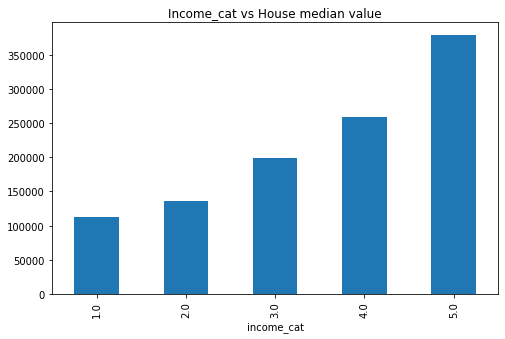

In [59]:
# Como a renda influencia o preco medio de classes.
housing.groupby(['income_cat'])['median_house_value'].mean().plot(kind='bar', figsize=(8,5))
plt.title('Income_cat vs House median value')
plt.show()

## **Implementando `Scikit-Learn’s StratifiedShuffleSplit class`. Essa tecnica vai providenciar uma maneira de validar os modelos in ML atraves do `StratifiedShuffleSplit`, que divide o set de dados em diferentes partes de forma aleatoria para implementar, treinar e testar os modelos.**

* Now you are ready to do stratified sampling based on the income category. For this you can use `Scikit-Learn’s StratifiedShuffleSplit class`:

* `StratifiedShuffleSplit`: Provides train/test indices to split data in train/test sets. This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.

<img src="images/test_train.png" style="width:360px;height:120px;">

In [60]:
# Implementar tecnica decrita acima
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(housing, housing["income_cat"]):
        strat_train_set = housing.loc[train_index]  # dataframe with index
        strat_test_set = housing.loc[test_index]    # dataframe with index

## Let’s see if this worked as expected. You can start by looking at the income category proportions in `strat_train_set` and `strat_test_set`.

In [61]:
# Vamos checar os dados apos implementar a tecnica e verificar se o percentual obtido e o esperado.
dic = {'Test set': strat_test_set, 'Train set': strat_train_set}
for name, df in dic.items():
    print("-------" + name + "-------")
    print(df["income_cat"].value_counts() / len(df)*100)

-------Test set-------
3.0    35.053295
2.0    31.879845
4.0    17.635659
5.0    11.458333
1.0     3.972868
Name: income_cat, dtype: float64
-------Train set-------
3.0    35.059351
2.0    31.885901
4.0    17.629603
5.0    11.440165
1.0     3.984981
Name: income_cat, dtype: float64


## Now you should remove the income_cat attribute so the data is back to its original state:

In [62]:
# Vamos remover os dados de income category e levar os dados pro estado inicial.
for set in (strat_train_set, strat_test_set): 
    set.drop(["income_cat"], axis=1, inplace=True)

# Explore and Visualize the Data to Gain Insights

* First, make sure you have put the `test set` aside and you are only exploring the `train set`. Also, if the `train set` is very large, you may want to sample an exploration set, to make manipulations easy and fast. In our case, the set is quite small so you can just work directly on the full set. Let’s create a copy so you can play with it without harming the `train set`:

```python
housing = strat_train_set.copy()
```

In [63]:
# Vamos explorar e visualizar dados pra obter ideias de como atacar o projeto e criar o modelo!!!
housing = strat_train_set.copy() 

### Visualizing Geographical Data

* Since there is geographical information (latitude and longitude), it is a good idea to create a `scatterplot` of all districts to visualize the data.

* A `scatterplot` is a type of data display that shows the relationship between two numerical variables. 

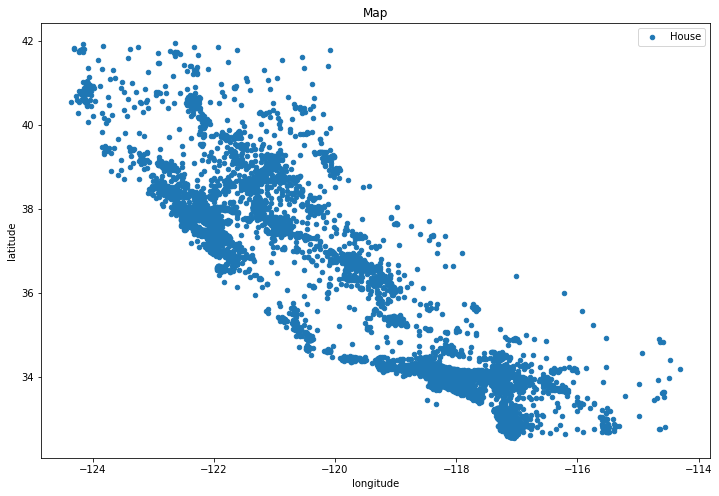

In [64]:
# Data points no mapa distribuido geograficamente.
housing.plot(kind="scatter", x="longitude", y="latitude", label = "House", figsize=(12, 8))
plt.title('Map')
plt.show()

**Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points.**

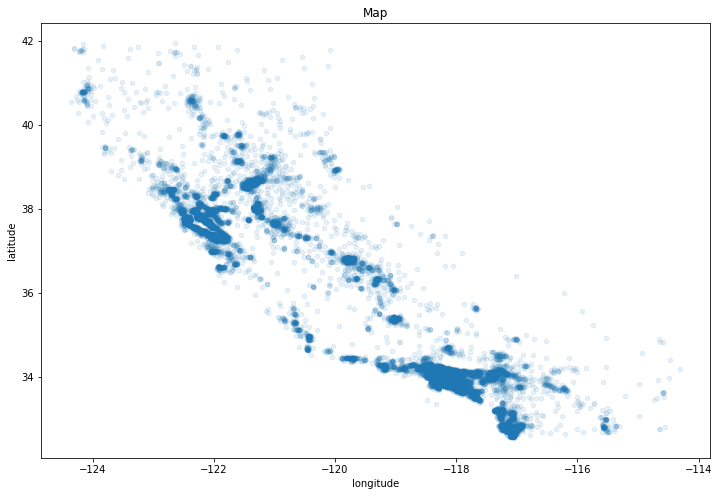

In [65]:
# Data points e contraste com densidade!!!
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize=(12, 8))
plt.title('Map')
plt.show()

**Now let’s look at the housing prices. The radius of each circle represents the district’s population (option s), and the color represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from blue `(low values)` to red `(high prices)`:15**

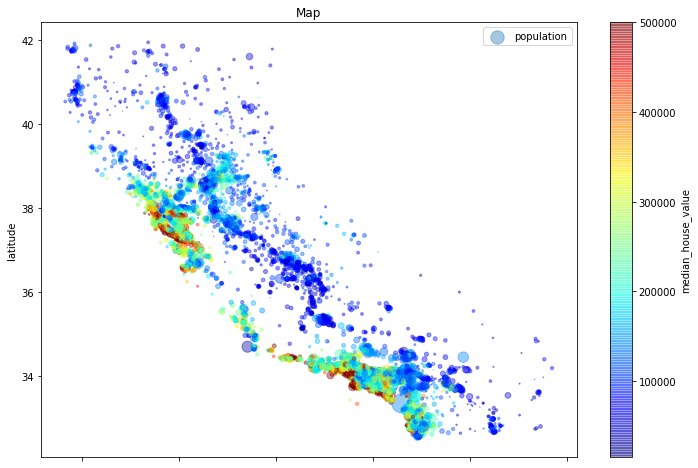

In [66]:
# Data points com descricao dos precos das casas.
# This image tells you that the housing prices are very much related to the location
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
         s=housing["population"]/100, label="population",
         c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
         figsize=(12, 8)
)
# plt.legend()
plt.title('Map')
plt.show()

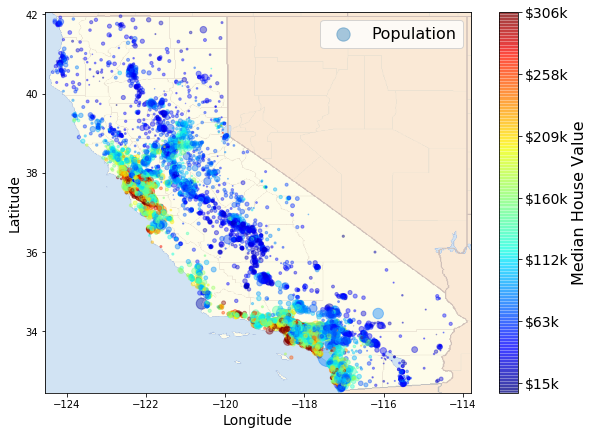

In [67]:
# Dados visualizados com possibilidade de criacao de clusters.
PROJECT_ROOT_DIR = "."
california_img=mpimg.imread(PROJECT_ROOT_DIR + '/images/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

Ps: *It will probably be useful to use a clustering algorithm to detect the main groups, and add new features that measure the proximity to the cluster centers.* 

### Looking for Correlations

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north). Finally, coefficients close to zero mean that there is no linear correlation.

<img src="images/correlation.png" style="width:700px;height:200px;">

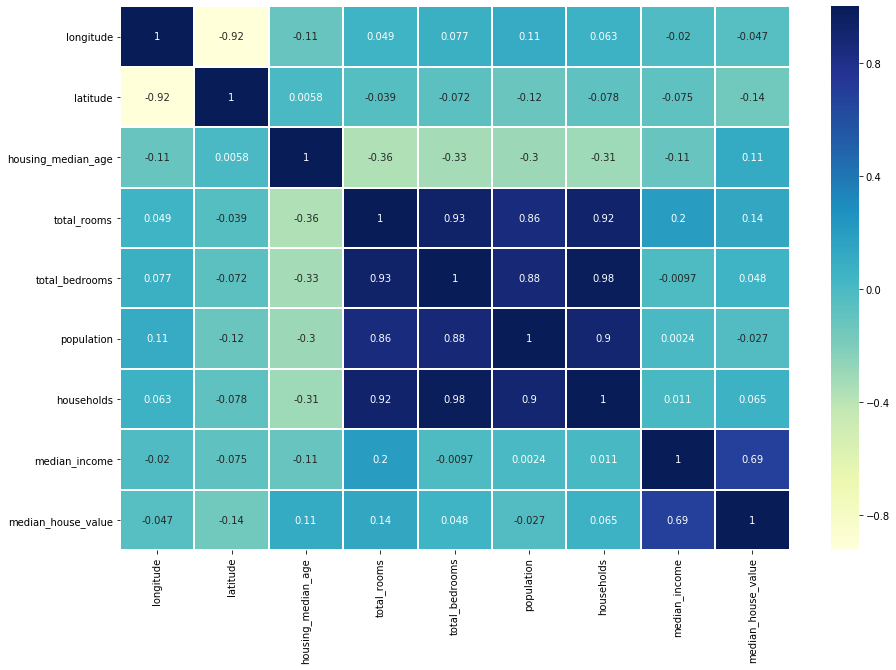

In [68]:
# Analise de correlacao entre variaveis! 
# A matrix de correlacao e apresentada abaixo!
fig, (axis1) = plt.subplots(1,1,figsize=(15,10))
# df.corr() Compute pairwise correlation of columns, excluding NA/null values.
# sns.heatmap() Plot rectangular data as a color-encoded matrix.
sns.heatmap(housing.corr(),annot=True,linewidths=1,cmap="YlGnBu")
plt.show()

The most promising attribute to predict the median house value is the median income, so let’s zoom in on their correlation scatterplot

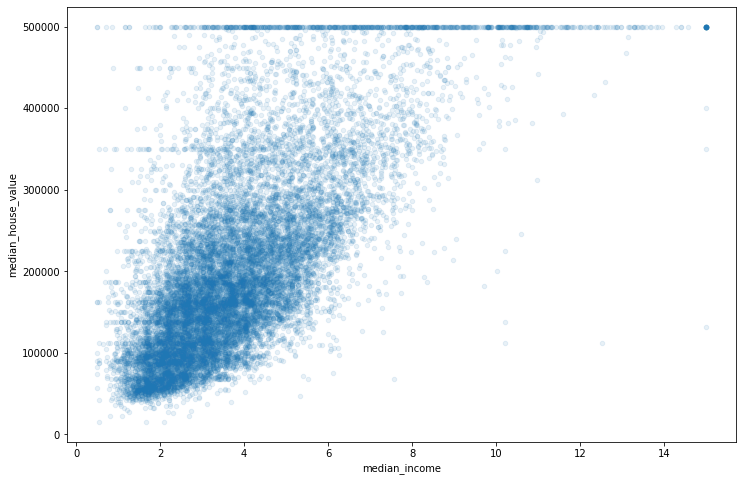

In [69]:
# Renda mediana vs valor mediano das casas
# Median income versus median house value
housing.plot(kind="scatter", x="median_income", y="median_house_value",
                 alpha=0.1, figsize=(12,8))
plt.show()

* This plot reveals a few things. First, the correlation is indeed very strong; you can clearly see the upward trend and the points are not too dispersed. Second, the price cap that we noticed earlier is clearly visible as a horizontal line at `$500,000`. But this plot reveals other less obvious straight lines: a horizontal line around `$450,000`, another around `$350,000`, perhaps one around `$280,000`, and a few more below that. You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks. **Esse grafico mostra a correlacao forte e padroes e tendencias. Linas retas podem ser observadas em alguns pontos e em ordem de nao obter esse padrao estranho nas predicoes, interessante seria a remocao desses dados.**

### Experimenting with Attribute Combinations

**One last thing you may want to do before actually preparing the data for Machine Learning algorithms is to try out various attribute combinations.**

* For example, the total number of rooms in a district is not very useful if you don’t know how many households there are. What you really want is the number of rooms per household. Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at. Let’s create these new attributes. **A criacao de dados antes do treino no ML deve ser encorajado sempre que possivel e vai depender do quanto vc conhece na industria em que esta trabalhando. Algumas novas features saocriadas abaixo. E essa tecnica se enquadra na engenharia de features (como eh conhecida e mencionada na literatura e industria).**

In [70]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

* And now let’s look at the correlation matrix again:

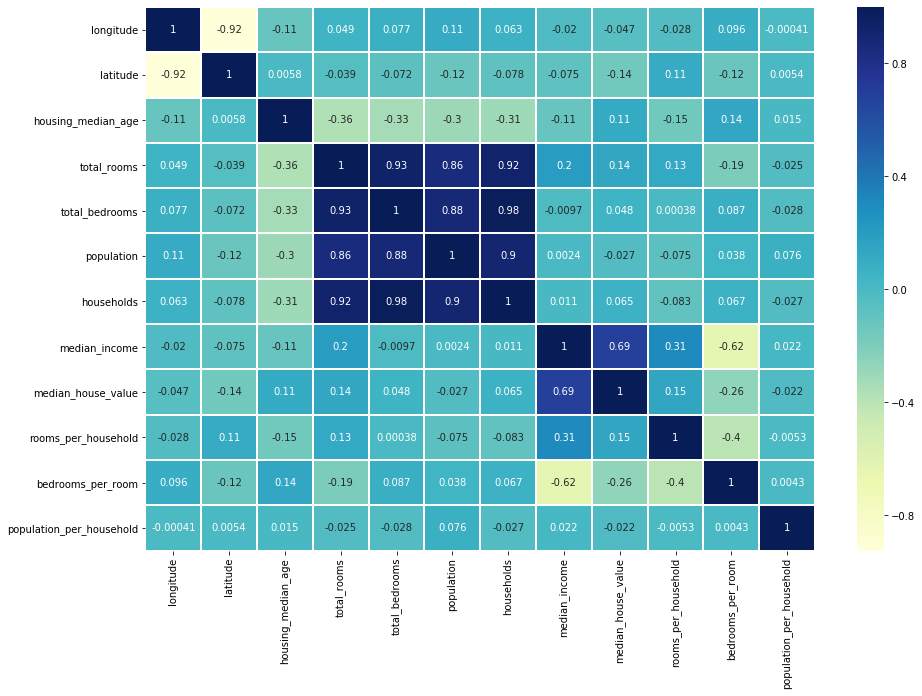

In [71]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,10))
# df.corr() Compute pairwise correlation of columns, excluding NA/null values.
# sns.heatmap() Plot rectangular data as a color-encoded matrix.
sns.heatmap(housing.corr(),annot=True,linewidths=1,cmap="YlGnBu")
plt.show()

* Hey, not bad! The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive.**Uma interessante correlacao e apresentada pela ligacao entre target com quartos por comodo (que foi uma feature criada por nos)!**

# Prepare the Data for Machine Learning Algorithms

* First let’s revert to a clean training set (by copying strat_train_set once again), and let’s separate the predictors and the labels since we don’t necessarily want to apply the same transformations to the predictors and the target values (note that `drop()` creates a copy of the data and does not affect strat_train_set). **Vamos usar os dados originais mais uma vez, criando uma copia desses dados.**

In [72]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Data Cleaning

* Most Machine Learning algorithms cannot work with missing features, so let’s create a few functions to take care of them. You can see below that the total_bedrooms attribute has some missing values, so let’s fix this. You have three options: **Alguns algoritmos nao podem ser usados com valores faltantes, por isso precisamos preencher os missing values. O que pode ser feito eh o preenchimento desses dados faltantes, apagar as features ou as observacoes.**
- Get rid of the corresponding districts.
- Get rid of the whole attribute.
- Set the values to some value (zero, the mean, the median, etc.).
You can accomplish these easily using DataFrame’s `dropna()`, `drop()`, and `fillna()` methods:

In [73]:
 print(housing.apply(lambda x: sum(x.isnull()), axis=0))

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64


* Scikit-Learn provides a handy class to take care of missing values: Imputer. Here is how to use it. First, you need to create an Imputer instance, specifying that you want to replace each attribute’s missing values with the median of that attribute: **Para trabalhar com missing values vamos usar uma funcao do SKLEARN**

In [74]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

* Since the median can only be computed on numerical attributes, we need to create a copy of the data without the text attribute ocean_proximity **criamos uma copia da feature para o preenchimento, ja que os dados sao de texto.**

In [75]:
housing_num = housing.drop("ocean_proximity", axis=1)

* Now you can fit the imputer instance to the training data using the `fit()` method: **os dados, agora numericos podem ser inseridos.**

* The imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable. Only the total_bedrooms attribute had missing values, but we cannot be sure that there won’t be any missing values in new data after the system goes live, so it is safer to apply the imputer to all the numerical attributes:


In [76]:
imputer.fit(housing_num)
np.array_equal([imputer.statistics_], [housing_num.median().values])

True

* Now you can use this “trained” imputer to transform the training set by replacing missing values by the learned medians:

* The result is a plain Numpy array containing the transformed features. If you want to put it back into a Pandas DataFrame, it’s simple:

In [77]:
# Fazendo os dados ficarem no formato de pandas para implementar o ML model
X = imputer.transform(housing_num) # numpy.ndarray
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index = list(housing.index.values))
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,533.998123,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,410.839621,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


## Handling Text and Categorical Attributes

Earlier we left out the categorical attribute ocean_proximity because it is a text attribute so we cannot compute its median. Most Machine Learning algorithms prefer to work with numbers anyway, so let’s convert these text labels to numbers. **A maioria dos algoritmos nao reconhece texto, entao agora vamos codificar texto em numeros utilizando o one-hot-encoder.**

Scikit-Learn provides a transformer for this task called LabelEncoder:

In [78]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20

In [79]:
housing_cat = housing[['ocean_proximity']]
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

* One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. Obviously this is not the case (for example, categories 0 and 4 are more similar than categories 0 and 1). To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).
* Scikit-Learn provides a OneHotEncoder encoder to convert integer categorical values into one-hot vectors. Let’s encode the categories as one-hot vectors. Note that `fit_transform()` expects a 2D array, but housing_cat_encoded is a 1D array, so we need to reshape it.

In [80]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [81]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

* Notice that the output is a SciPy sparse matrix, instead of a NumPy array. This is very useful when you have categorical attributes with thousands of categories. After OneHotEncoding we get a matrix with thousands of columns, and the matrix is full of zeros except for one 1 per row. Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the nonzero elements.

## Custom Transformers

In [82]:
from sklearn.preprocessing import FunctionTransformer

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

* In this example the transformer has one hyperparameter, add_bedrooms_per_room, set to True by default (it is often helpful to provide sensible defaults). This hyperparameter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithms or not. More generally, you can add a hyperparameter to gate any data preparation step that you are not 100% sure about. The more you automate these data preparation steps, the more combinations you can automatically try out, making it much more likely that you will find a great combination (and saving you a lot of time). **Novas variaveis sao adicionados, e os parametros serao testados. Tambem, os hyperparameters sao automatizados para teste.**

In [83]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


## Feature Scaling

* One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Note that scaling the target values is generally not required. **Deixar os dados na mesma escala vai auxiliar, como ja vimos na quantidade de iteracoes para se chegar ao minimo da funcao de predicao que vai fornecer os melhores pesos/coeficientes.**

* Now let's build a pipeline for preprocessing the numerical attributes (note that we could use CombinedAttributesAdder() instead of FunctionTransformer(...) if we preferred): **Usando o pipeline do SKLEARN vamos desenvolver e implementar o modelo. Vale a pena ressaltar que nesse exemplo nao vamos usar na unha o codigo de regressao linear, mas usar a library do site.**

* Now let's build a pipeline for preprocessing the numerical attributes (note that we could use `CombinedAttributesAdder()` instead of `FunctionTransformer(...)` if we preferred):

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [85]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [86]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

In [87]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [88]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

# Select and Train a Model

## Training and Evaluating on the Training Set

In [89]:
# Treinando e Avaliando o modelo de regressao linear nesse exemplo!!!!
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


Compare against the actual values:

In [91]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


## Como medir o erro em modelos de regressao?
### RMSE 

$$
\text{RMSE} = \sqrt{\frac{1}{m}\sum^m_{i=0}(\text{Predicted}^{(i)}-\text{Atual}^{(i)})^2}
$$


In [92]:
from sklearn.metrics import mean_squared_error  

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

### MAE
<img src="images/mae.png" style="width:300px;height:175px;">

In [93]:
from sklearn.metrics import mean_absolute_error   

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49439.89599001897

## Better Evaluation Using Cross-Validation

One way to evaluate the model would be to use the train_test_split function to split the training set into a smaller training set and a validation set, then train your models against the smaller training set and evaluate them against the validation set. It’s a bit of work, but nothing too difficult and it would work fairly well. **Avaliacao do model atraves de cross-validation. Medir RMSE e MAE depois de dividir os dados em sub conjunto de dados.**

<img src="images/cross_validation.png" style="width:350px;height:200px;">

In [94]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [95]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798349


# Exercises
1) Implement Random Forest and Decision Tree models over the same dataset and compare (RMSE) with the Linear Regression Models already implemented. Use the SKLEARN algorithms and default hyperparameters. **Implementar modelos de arvoes de decisao e random forest, usar SKLEARN algorithms. Comparar (RMSE) resultados com modelo de Linear regression.**

2) Run the Linear Regression model one more time, however, do not use new features created, just the plain data issued. **Rodar modelo com dados "cru" sem novas features ou trabalhar com dados, o que acontece?**

# Bibliography
https://scikit-learn.org/stable/

https://github.com/ageron